## trabajo final

In [ ]:
# importamos las librerias necesarias
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#NOTA: Asegurarse de tener las librerias instaladas
#pip install pandas openpyxl matplotlib seaborn numpy

#Extraccion de datos

#definir la ruta del archivo xlsx
ruta_archivo = 'DatosInscritosINTEP2025.xlsx'
ext = Path(ruta_archivo).suffix.lower()
if ext == '.xlsx' or ext == '.xls':
    df = pd.read_excel(ruta_archivo)
elif ext == '.csv':
    df = pd.read_csv(ruta_archivo)
else:
    raise ValueError("Formato de archivo no soportado. Por favor use .xlsx, .xls o .csv")
#Mostrar las primeras filas del dataframe
print(df.head())





   CARPETA_CONSECUTIVO SINCRONIZAR GEGARSOFT   IDENTIDAD    PERIODO  \
0                    1                     S    16848365 2025-01-01   
1                    2                     S  1005829403 2019-02-01   
2                    3                     S  1114122721 2019-02-01   
3                    4                     S  1006592403 2019-02-01   
4                    5                     S  1112881642 2022-02-01   

  PRIMER NOMBRE SEGUNDO NOMBRE PRIMER APELLIDO SEGUNDO APELLIDO  \
0        YEISON         ANDRES           GOMEZ           ANGULO   
1        NORMAN         STEVEN         ESCOBAR          RAMIREZ   
2         KAREN        VIVIANA         RAMIREZ            NIEVA   
3          LADY        TATIANA     BUSTAMANTE            OSORIO   
4        MICHEL         STIVEN          ENCIZO            LOPEZ   

  TIPO DOCUMENTO  FECHA EXPEDICION  ... PRUEBA 06  PUNTAJE 06 PRUEBA 07  \
0             CC           37349.0  ...       NaN         NaN       NaN   
1             CC    

In [15]:
#guardar el dataframe en un archivo csv
df.to_csv('DatosInscritosINTEP2025.csv', index=False)
# ...existing code...

print("Datos guardados en DatosInscritosINTEP2025.csv")



 

Datos guardados en DatosInscritosINTEP2025.csv


In [16]:
#exploracion y limpieza de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16128 entries, 0 to 16127
Columns: 118 entries, CARPETA_CONSECUTIVO to RECIBO DE PAGO
dtypes: datetime64[ns](1), float64(44), int64(2), object(71)
memory usage: 14.5+ MB
None


In [18]:
#recorriendo el dataframe  final por columnas
for columna in df.columns:
    print(f"Columna: {columna}")
    #print(df[columna].value_counts(dropna=False))  # Mostrar conteo de valores incluyendo NaN
    print("\n")

Columna: CARPETA_CONSECUTIVO


Columna: SINCRONIZAR GEGARSOFT


Columna: IDENTIDAD


Columna: PERIODO


Columna: PRIMER NOMBRE


Columna: SEGUNDO NOMBRE


Columna: PRIMER APELLIDO


Columna: SEGUNDO APELLIDO


Columna: TIPO DOCUMENTO


Columna: FECHA EXPEDICION


Columna: TIPO DE SANGRE


Columna: ID CIUDAD EXPEDICION


Columna: CIUDAD EXPEDICION


Columna: DEPTO EXPEDICION


Columna: GENERO


Columna: EMAIL


Columna: TELEFONO


Columna: CELULAR


Columna: FECHA NACIMIENTO


Columna: ID LUGAR NACIMIENTO


Columna: CIUDAD NACIMIENTO


Columna: DEPTO NACIMIENTO


Columna: ESTADO CIVIL


Columna: LIBRETA MILITAR


Columna: DISTRITO MILITAR


Columna: DIRECCION


Columna: ZONA


Columna: ID CIUDAD RESIDENCIA


Columna: CIUDAD RESIDENCIA


Columna: DEPTO RESIDENCIA


Columna: ESTRATO


Columna: NIVEL SISBEN


Columna: PUNTAJE SISBEN


Columna: CAPACIDAD EXCEPCIONAL


Columna: DISCAPACIDAD


Columna: DEPORTE


Columna: ID INSTITUCION EDUCATIVA


Columna: NOMBRE IE


Columna: ID CIUDAD IE




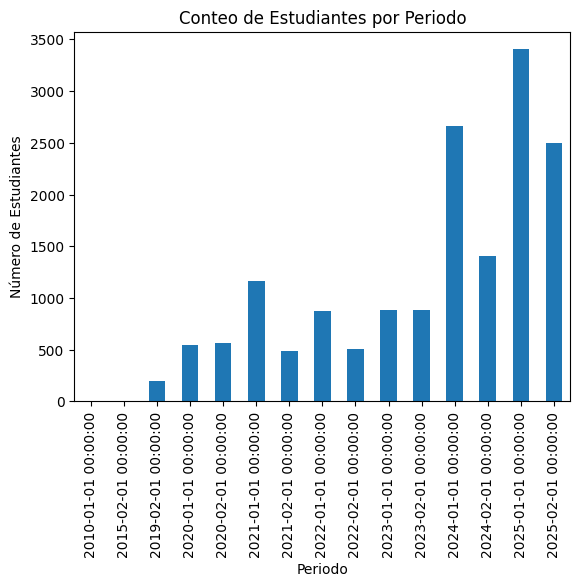

PERIODO
2010-01-01       1
2015-02-01       1
2019-02-01     200
2020-01-01     550
2020-02-01     570
2021-01-01    1166
2021-02-01     492
2022-01-01     874
2022-02-01     511
2023-01-01     882
2023-02-01     885
2024-01-01    2661
2024-02-01    1411
2025-01-01    3403
2025-02-01    2497
dtype: int64

In [32]:
#agrupar por periodo academico y contar estudiantes
conteo_periodo = df.groupby('PERIODO').size()

conteo_periodo.plot(kind='bar', title='Conteo de Estudiantes por Periodo', xlabel='Periodo', ylabel='Número de Estudiantes')
plt.show()

conteo_periodo

0    2025-1
1    2019-2
2    2019-2
3    2019-2
4    2022-2
Name: PERIODO, dtype: object


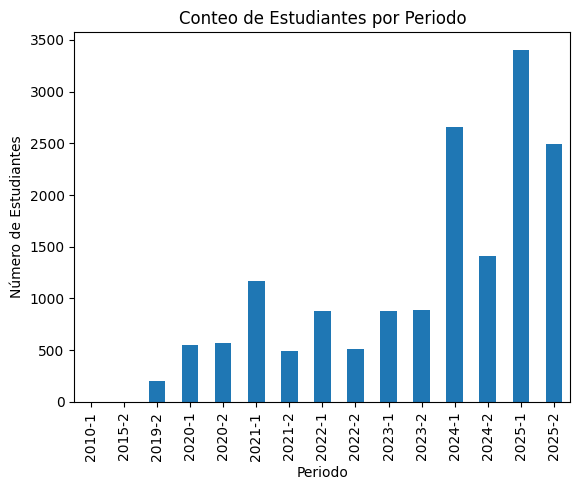

PERIODO
2010-1       1
2015-2       1
2019-2     200
2020-1     550
2020-2     570
2021-1    1166
2021-2     492
2022-1     874
2022-2     511
2023-1     882
2023-2     885
2024-1    2661
2024-2    1411
2025-1    3403
2025-2    2497
dtype: int64

In [51]:
#modificar el formato de la columna PERIODO a solo año y semestre
#por ejemplo, convertir "2025-01-01" a "2025-1"
# "2025-02-01 a "2025-2"
# 2024-02-01 a "2024-2"
df['PERIODO'] = pd.to_datetime(df['PERIODO']).dt.strftime('%Y-%m')
df['PERIODO'] = df['PERIODO'].str.replace('-01', '-1').str.replace('-02', '-2')
print(df['PERIODO'].head())

#agrupar por periodo academico y contar estudiantes
conteo_periodo = df.groupby('PERIODO').size()

conteo_periodo.plot(kind='bar', title='Conteo de Estudiantes por Periodo', xlabel='Periodo', ylabel='Número de Estudiantes')
plt.show()

conteo_periodo


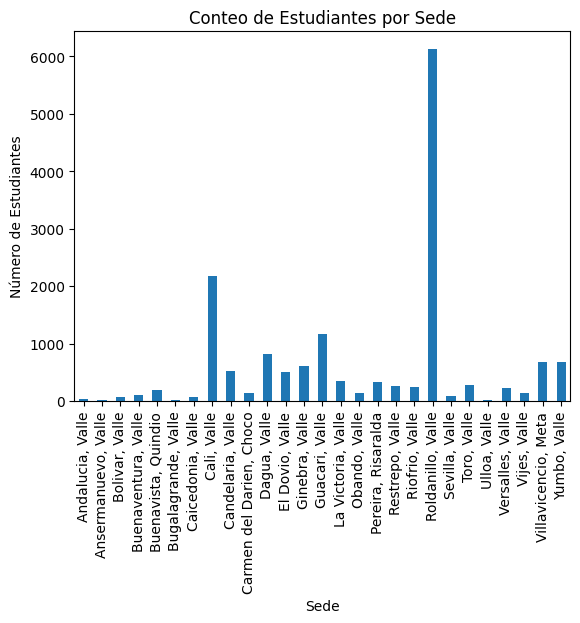

NOMBRE SEDE
Roldanillo, Valle           6125
Cali, Valle                 2168
Guacari, Valle              1162
Dagua, Valle                 822
Villavicencio, Meta          674
Yumbo, Valle                 671
Ginebra, Valle               610
Candelaria, Valle            522
El Dovio, Valle              504
La Victoria, Valle           347
Pereira, Risaralda           327
Toro, Valle                  272
Restrepo, Valle              266
Riofrio, Valle               243
Versalles, Valle             226
Buenavista, Quindio          199
Vijes, Valle                 140
Obando, Valle                138
Carmen del Darien, Choco     137
Buenaventura, Valle          110
Sevilla, Valle                90
Bolivar, Valle                65
Caicedonia, Valle             65
Andalucia, Valle              32
Bugalagrande, Valle           23
Ulloa, Valle                  23
Ansermanuevo, Valle            9
dtype: int64

In [45]:
# agrupor por la clumna cNOMBRE SEDE y contar estudiantes
conteo_sede = df.groupby('NOMBRE SEDE').size()  

conteo_sede.plot(kind='bar', title='Conteo de Estudiantes por Sede', xlabel='Sede', ylabel='Número de Estudiantes')
plt.show()
conteo_sede.sort_values(ascending=False)

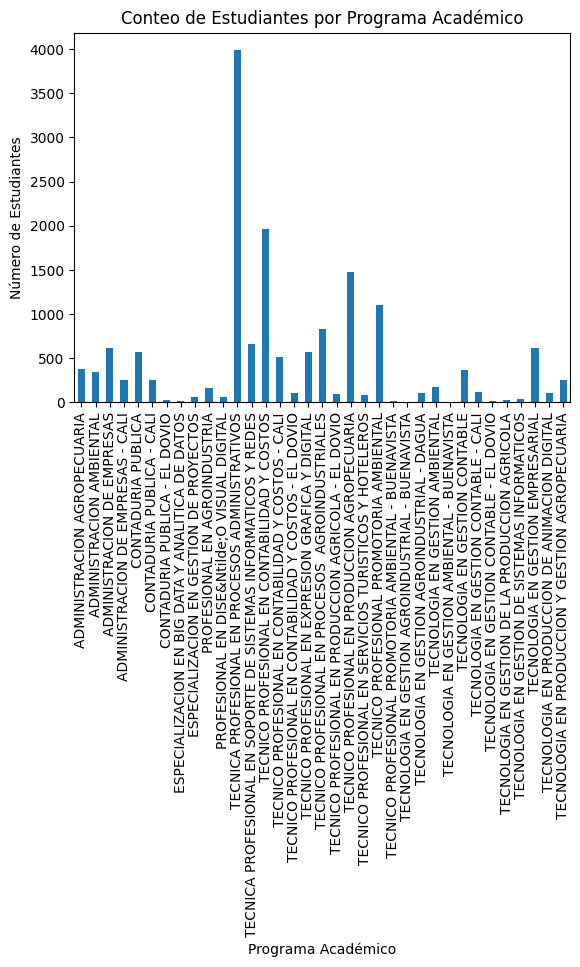

NOMBRE PROGRAMA
TECNICA PROFESIONAL EN PROCESOS ADMINISTRATIVOS                    3988
TECNICO PROFESIONAL EN CONTABILIDAD Y COSTOS                       1961
TECNICO PROFESIONAL EN PRODUCCION AGROPECUARIA                     1477
TECNICO PROFESIONAL PROMOTORIA AMBIENTAL                           1107
TECNICO PROFESIONAL EN PROCESOS  AGROINDUSTRIALES                   829
TECNICA PROFESIONAL EN SOPORTE DE SISTEMAS INFORMATICOS Y REDES     665
ADMINISTRACION DE EMPRESAS                                          615
TECNOLOGIA EN GESTION EMPRESARIAL                                   613
TECNICO PROFESIONAL EN EXPRESION GRAFICA Y DIGITAL                  566
CONTADURIA PUBLICA                                                  564
TECNICO PROFESIONAL EN CONTABILIDAD Y COSTOS - CALI                 508
ADMINISTRACION AGROPECUARIA                                         378
TECNOLOGIA EN GESTION CONTABLE                                      360
ADMINISTRACION AMBIENTAL                        

In [ ]:
#agrupar los inscritos por programa academico por 
conteo_programa = df.groupby('NOMBRE PROGRAMA').size()
conteo_programa.plot(kind='bar', title='Conteo de Estudiantes por Programa Académico', xlabel='Programa Académico', ylabel='Número de Estudiantes')
plt.show()
#mostrar el conteo por programa en orden descendente
conteo_programa.sort_values(ascending=False)


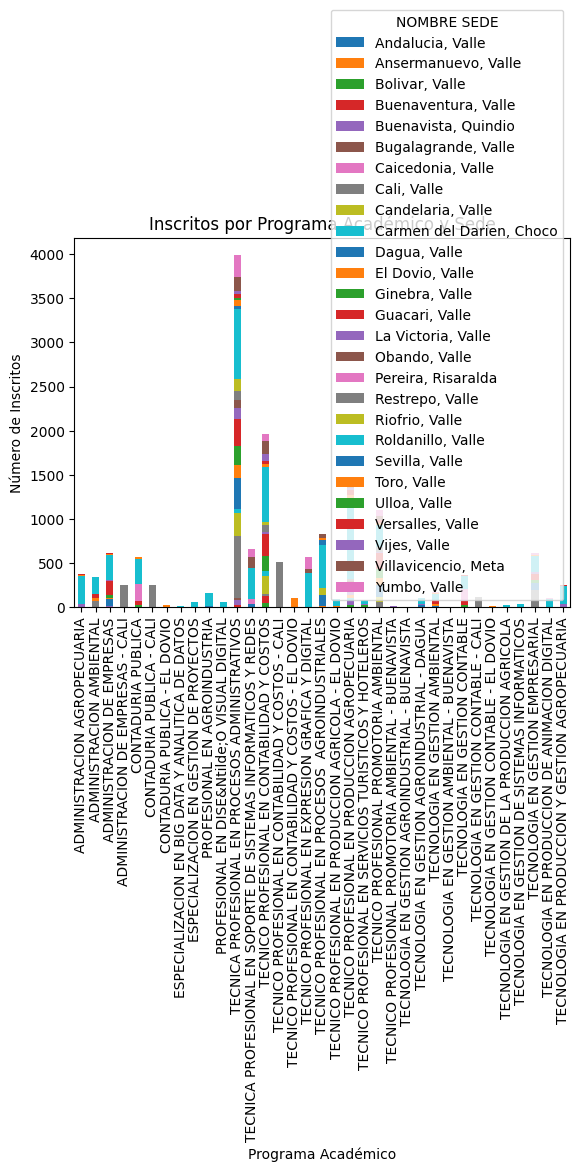

In [52]:
# mostrar los incritos por programa academico y sede e

programa_sede = df.groupby(['NOMBRE PROGRAMA', 'NOMBRE SEDE']).size().unstack(fill_value=0)
programa_sede.plot(kind='bar', stacked=True, title='Inscritos por Programa Académico y Sede', xlabel='Programa Académico', ylabel='Número de Inscritos')
plt.show()


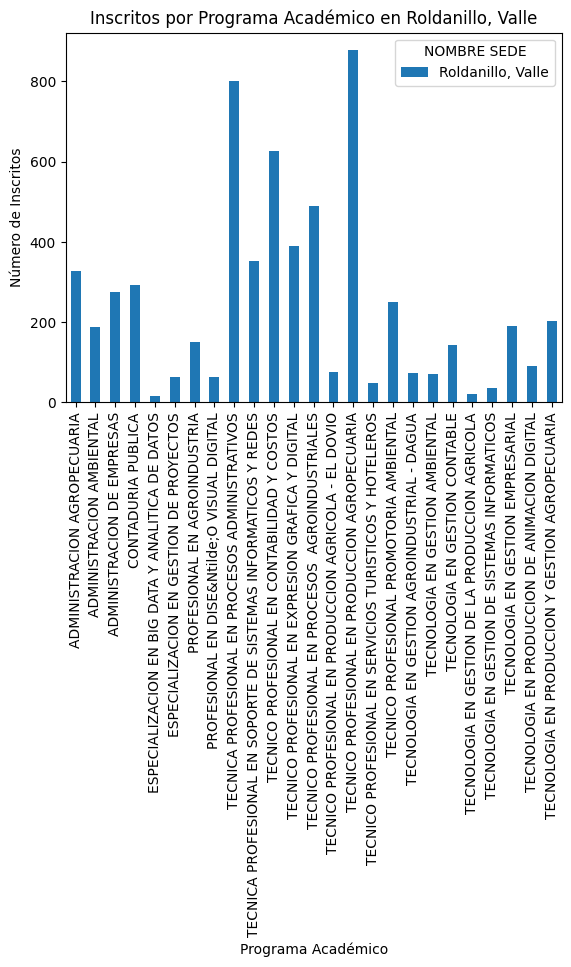

NOMBRE SEDE,"Roldanillo, Valle"
NOMBRE PROGRAMA,
TECNICO PROFESIONAL EN PRODUCCION AGROPECUARIA,878
TECNICA PROFESIONAL EN PROCESOS ADMINISTRATIVOS,801
TECNICO PROFESIONAL EN CONTABILIDAD Y COSTOS,626
TECNICO PROFESIONAL EN PROCESOS AGROINDUSTRIALES,490
TECNICO PROFESIONAL EN EXPRESION GRAFICA Y DIGITAL,390
TECNICA PROFESIONAL EN SOPORTE DE SISTEMAS INFORMATICOS Y REDES,352
ADMINISTRACION AGROPECUARIA,327
CONTADURIA PUBLICA,292
ADMINISTRACION DE EMPRESAS,275


In [53]:
# mostrar los incritos por programa academico y sede especificando Roldanillo, Valle 
nom_sede= "Roldanillo, Valle"
programa_sede = df[df['NOMBRE SEDE'] == nom_sede].groupby(['NOMBRE PROGRAMA', 'NOMBRE SEDE']).size().unstack(fill_value=0)

programa_sede.plot(kind='bar', stacked=True, title=f'Inscritos por Programa Académico en {nom_sede}', xlabel='Programa Académico', ylabel='Número de Inscritos')
plt.show()

programa_sede.sort_values(by=nom_sede, ascending=False)




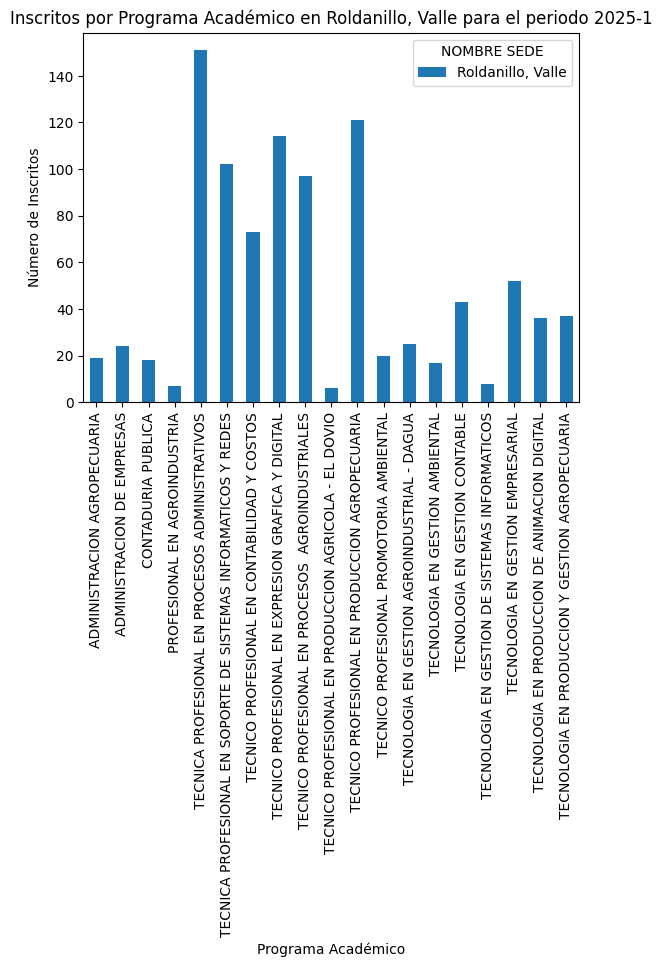

NOMBRE SEDE,"Roldanillo, Valle"
NOMBRE PROGRAMA,
TECNICA PROFESIONAL EN PROCESOS ADMINISTRATIVOS,151
TECNICO PROFESIONAL EN PRODUCCION AGROPECUARIA,121
TECNICO PROFESIONAL EN EXPRESION GRAFICA Y DIGITAL,114
TECNICA PROFESIONAL EN SOPORTE DE SISTEMAS INFORMATICOS Y REDES,102
TECNICO PROFESIONAL EN PROCESOS AGROINDUSTRIALES,97
TECNICO PROFESIONAL EN CONTABILIDAD Y COSTOS,73
TECNOLOGIA EN GESTION EMPRESARIAL,52
TECNOLOGIA EN GESTION CONTABLE,43
TECNOLOGIA EN PRODUCCION Y GESTION AGROPECUARIA,37


In [ ]:
#mostrar los inscritos por programa academico y sede especificando "Roldanillo, Valle" en el periodo "2025-1"
nom_sede= "Roldanillo, Valle"
periodo= "2025-1"
programa_sede_periodo = df[(df['NOMBRE SEDE'] == nom_sede) & (df['PERIODO'] == periodo)].groupby(['NOMBRE PROGRAMA', 'NOMBRE SEDE']).size().unstack(fill_value=0)  
programa_sede_periodo.plot(kind='bar', stacked=True, title=f'Inscritos por Programa Académico en {nom_sede} para el periodo {periodo}', xlabel='Programa Académico', ylabel='Número de Inscritos')
plt.show()
programa_sede_periodo.sort_values(by=nom_sede, ascending=False)


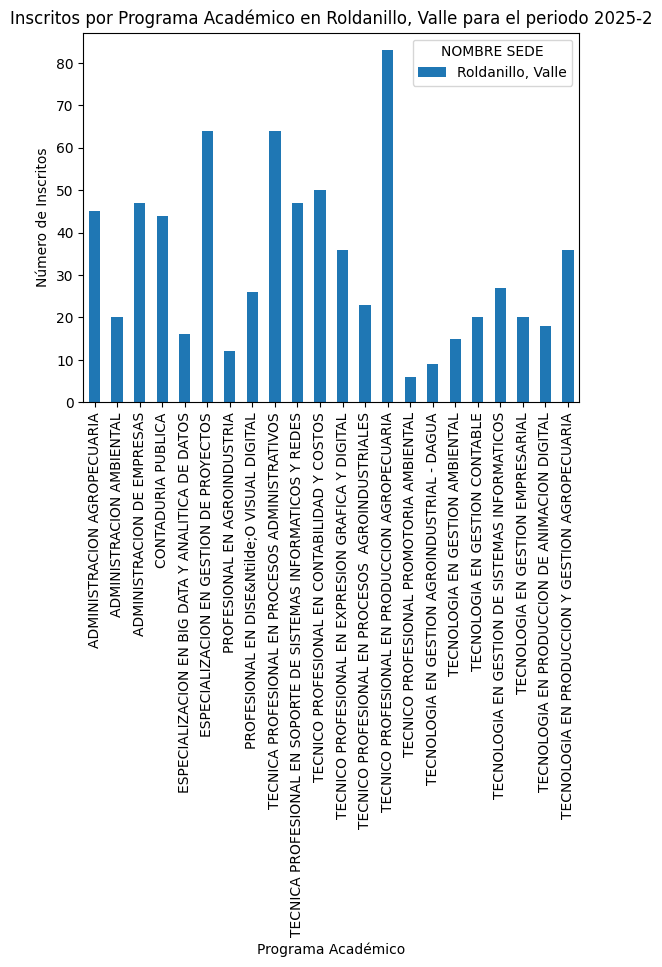

NOMBRE SEDE,"Roldanillo, Valle"
NOMBRE PROGRAMA,
TECNICO PROFESIONAL EN PRODUCCION AGROPECUARIA,83
ESPECIALIZACION EN GESTION DE PROYECTOS,64
TECNICA PROFESIONAL EN PROCESOS ADMINISTRATIVOS,64
TECNICO PROFESIONAL EN CONTABILIDAD Y COSTOS,50
TECNICA PROFESIONAL EN SOPORTE DE SISTEMAS INFORMATICOS Y REDES,47
ADMINISTRACION DE EMPRESAS,47
ADMINISTRACION AGROPECUARIA,45
CONTADURIA PUBLICA,44
TECNICO PROFESIONAL EN EXPRESION GRAFICA Y DIGITAL,36


In [56]:
#mostrar los inscritos por programa academico y sede especificando "Roldanillo, Valle" en el periodo "2025-2"
nom_sede= "Roldanillo, Valle"
periodo= "2025-2"
programa_sede_periodo = df[(df['NOMBRE SEDE'] == nom_sede) & (df['PERIODO'] == periodo)].groupby(['NOMBRE PROGRAMA', 'NOMBRE SEDE']).size().unstack(fill_value=0)  
programa_sede_periodo.plot(kind='bar', stacked=True, title=f'Inscritos por Programa Académico en {nom_sede} para el periodo {periodo}', xlabel='Programa Académico', ylabel='Número de Inscritos')
plt.show()
programa_sede_periodo.sort_values(by=nom_sede, ascending=False)

In [ ]:
#generar columna  edad a partir de la columna FECHA NACIMIENTO

#generar un dataframe limpio con las columnas relevantes
df_limpio = df[['NOMBRE PROGRAMA', 'NOMBRE SEDE', 'PERIODO', 'NOMBRE ESTUDIANTE', 'TIPO DOCUMENTO', 'NUMERO DOCUMENTO']]